**Assignment Week 3: NLTK**  
**Yigao Li**  
*Sep 11, 2018*

# Chapter 2 Exercise 4

                       men  women people 
    1945-Truman.txt      2      2     10 
    1946-Truman.txt     12      7     49 
    1947-Truman.txt      7      2     12 
    1948-Truman.txt      4      1     22 
    1949-Truman.txt      2      1     15 
    1950-Truman.txt      6      2     15 
    1951-Truman.txt      8      2      9 
1953-Eisenhower.txt      3      0     17 
1954-Eisenhower.txt      2      0     15 
1955-Eisenhower.txt      4      0     26 
1956-Eisenhower.txt      2      2     30 
1957-Eisenhower.txt      5      2     11 
1958-Eisenhower.txt      2      1     19 
1959-Eisenhower.txt      4      1     11 
1960-Eisenhower.txt      2      0     10 
   1961-Kennedy.txt      6      0     10 
   1962-Kennedy.txt      6      2     10 
   1963-Johnson.txt      0      0      3 
   1963-Kennedy.txt      8      5     12 
   1964-Johnson.txt      3      1      3 
 1965-Johnson-1.txt      7      0     16 
 1965-Johnson-2.txt     11      3     14 
   1966-Johnson.txt     12      1 

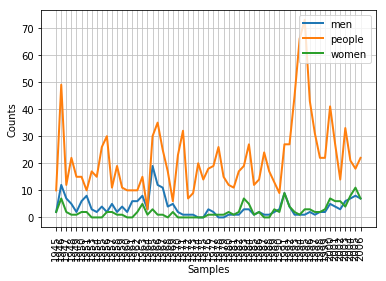

In [1]:
import nltk
from nltk.corpus import state_union
cfd_wordcount = nltk.ConditionalFreqDist(
    (file, word)
    for file in state_union.fileids()
    for word in state_union.words(file)
    if word.lower() in ["men", "women", "people"])
cfd_wordcount.tabulate(conditions = state_union.fileids(), samples = ["men", "women", "people"])
cfd_plot = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in state_union.fileids()
    for w in state_union.words(fileid)
    for target in ["men", "women", "people"]
    if w.lower() == target)
cfd_plot.plot()

The word "women" appears more frequently over time. "men" and "people" do not have clear trends. Their occurrences fluctuate randomly.

# Chapter 2 Exercise 8

In [2]:
from nltk.corpus import names
female_names = names.words(names.fileids()[0])
male_names = names.words(names.fileids()[1])
cfd_names = nltk.ConditionalFreqDist(
    (name[:1], fileid[:-4])
    for fileid in names.fileids()
    for name in names.words(fileid))
cap_letter = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M",
              "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
cfd_names.tabulate(conditions = cap_letter, samples = ["female", "male"])

  female   male 
A    443    213 
B    246    173 
C    469    166 
D    308    146 
E    251    119 
F    144     87 
G    213    156 
H    124    163 
I     83     45 
J    293    144 
K    276     70 
L    332    113 
M    484    200 
N    158     77 
O     66     52 
P    121    101 
Q      9     15 
R    247    200 
S    309    238 
T    198    188 
U     14     22 
V    105     50 
W     54    151 
X      5      7 
Y     18     16 
Z     31     31 


Initial letter "H", "Q", "U", "W", "X" are more frequent for male names.

# Chapter 2 Exercise 16

In [3]:
from nltk.corpus import brown
def lexical_diversity(text):
    return len(set(text))/len(text)
for genre in brown.categories():
    if len(genre) > 7:
        print("{}\t{}\t{}\t{}".format(genre, len(brown.words(categories=genre)), len(set(brown.words(categories=genre))),
                                      lexical_diversity(brown.words(categories=genre))))
    else:
        print("{}\t\t{}\t{}\t{}".format(genre, len(brown.words(categories=genre)), len(set(brown.words(categories=genre))),
                                        lexical_diversity(brown.words(categories=genre))))

adventure	69342	8874	0.1279743878169075
belles_lettres	173096	18421	0.10642071451679992
editorial	61604	9890	0.16054152327770924
fiction		68488	9302	0.1358194136199042
government	70117	8181	0.11667641228232811
hobbies		82345	11935	0.14493897625842492
humor		21695	5017	0.23125144042406084
learned		181888	16859	0.09268890745953554
lore		110299	14503	0.13148804612915801
mystery		57169	6982	0.12212912592488936
news		100554	14394	0.14314696580941583
religion	39399	6373	0.1617553745018909
reviews		40704	8626	0.21192020440251572
romance		70022	8452	0.12070492131044529
science_fiction	14470	3233	0.22342778161713892


"learned" genre has the lowest lexical diversity. This is not surprising because books like *Probability with Statistical Application* have more professional vocabularies than other genres.

# Chapter 2 Exercise 17

In [4]:
# Function
def mostFreq50(text):
    stopwords = nltk.corpus.stopwords.words("english")
    content = [w for w in text if w.lower() not in stopwords]
    return nltk.FreqDist(content).most_common(50)
#Example
mostFreq50(state_union.words("2006-GWBush.txt"))

[(',', 323),
 ('.', 285),
 ('(', 68),
 ('.)', 65),
 ('Applause', 64),
 ('--', 61),
 ('America', 43),
 ("'", 37),
 ('-', 28),
 ('world', 27),
 ('us', 22),
 ('people', 22),
 ('must', 20),
 ('American', 18),
 ('nation', 17),
 ('country', 17),
 ('freedom', 17),
 ('economy', 16),
 (':', 15),
 ('also', 14),
 ('Congress', 13),
 ('new', 12),
 ('make', 11),
 ('year', 11),
 ('years', 11),
 ('Americans', 11),
 ('members', 10),
 ('life', 10),
 ('one', 10),
 ('lead', 10),
 ('government', 10),
 ('support', 10),
 ('citizens', 9),
 ('two', 9),
 ('great', 9),
 ('United', 9),
 ('States', 9),
 ('fight', 9),
 ('would', 9),
 ('every', 9),
 ('hopeful', 9),
 ('hope', 8),
 ('military', 8),
 ('Yet', 8),
 ('know', 8),
 ('need', 8),
 ('competitive', 8),
 ('tax', 8),
 ('society', 8),
 ('2006', 7)]

# Chapter 2 Exercise 18

In [5]:
# Program
def mostFreq50bigram(text):
    stopwords = nltk.corpus.stopwords.words("english")
    allbigrams = nltk.bigrams(text)
    content = [b for b in allbigrams if b[0].lower() not in stopwords and b[1].lower() not in stopwords]
    return nltk.FreqDist(content).most_common(50)
# Example
mostFreq50bigram(state_union.words("2006-GWBush.txt"))

[(('.', '('), 65),
 (('(', 'Applause'), 64),
 (('Applause', '.)'), 64),
 (('United', 'States'), 9),
 (('country', '.'), 8),
 (('world', '.'), 8),
 (('.', 'Tonight'), 7),
 (('America', 'competitive'), 7),
 (('hopeful', 'society'), 7),
 (('31', ','), 6),
 ((',', '2006'), 6),
 (('.', 'Yet'), 6),
 (('America', '.'), 6),
 (('Keeping', 'America'), 6),
 (('W', '.'), 5),
 ((',', 'Jan'), 5),
 (('Jan', '.'), 5),
 (('.', '31'), 5),
 (('.', 'White'), 5),
 (('White', 'House'), 5),
 (('House', 'photo'), 5),
 (('freedom', '.'), 5),
 (('Middle', 'East'), 5),
 (('economy', ','), 5),
 (('years', ','), 5),
 ((',', 'let'), 5),
 (('America', "'"), 5),
 (('must', 'also'), 5),
 (('.)', 'Keeping'), 5),
 (('competitive', 'requires'), 5),
 (('fellow', 'citizens'), 4),
 (('President', 'George'), 4),
 (('George', 'W'), 4),
 (('.', 'Bush'), 4),
 (('Union', 'Address'), 4),
 (('Tuesday', ','), 4),
 (('year', ','), 4),
 (('world', ','), 4),
 (('Eric', 'Draper'), 4),
 (('let', 'us'), 4),
 (('economy', '.'), 4),
 (('.)

# Chapter 2 Exercise 23
## a.

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


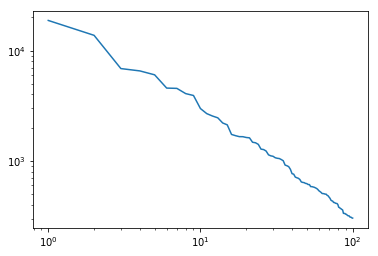

In [6]:
import pylab
from nltk.book import *
def zipf(text):
    wordFrequency = nltk.FreqDist(text).most_common(100)
    freq = []
    for i in range(100):
        freq.append(wordFrequency[i][1])
    rank = [i+1 for i in range(100)]
    pylab.plot(rank, freq)
    pylab.xscale("log")
    pylab.yscale("log")
    pylab.show()
zipf(text1)

Zipf's Law is true. $\log f+\log r=\log k\implies f\times r=k$, where $k$ is a constant. The line above is approximately a straight line.
## b.

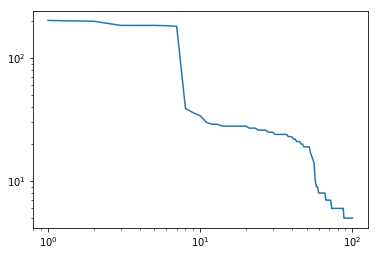

In [7]:
import random
random.seed(3432)
randomString = ''.join(random.choice("abcdefg ") for i in range(100000)).split()
zipf(randomString)

Zipf's Law only works if the text is "nature", other than some randomly generated texts.

# Chapter 2 Exercise 27

In [8]:
from nltk.corpus import wordnet as wn
def avgPolysemy(pos):
    count = 0
    total = 0
    for w in wn.all_lemma_names(pos = pos, lang = "eng"):
        total = total + len(wn.synsets(w, pos))
        count += 1
    return total/count
pos = ["n", "v", "a", "r"]
for p in pos:
    print(p, avgPolysemy(p), sep = "\t")

n	1.2610825311125826
v	2.1865729898516784
a	1.406536617160948
r	1.2532916759651864
